In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()
t = titles
t.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()
c = cast
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [96]:
t.groupby(['title']).size().sort_values(axis=0, ascending=False).head(10)

title
Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Othello                 11
Temptation              11
Freedom                 11
Kismet                  11
The Three Musketeers    11
dtype: int64

In [72]:
t.title.value_counts().head(10)

Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Othello                 11
The Three Musketeers    11
Temptation              11
Kismet                  11
Freedom                 11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [73]:
t = titles
t['decade'] = t.year // 10 * 10
f = t[t.decade == 1930]
f.groupby(['year']).size().sort_values().tail(3)

year
1938    1130
1936    1139
1937    1197
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

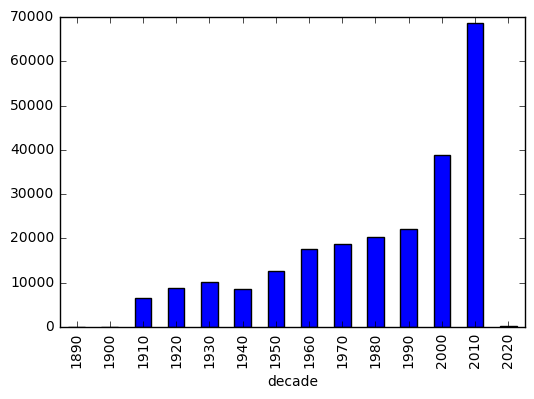

In [74]:
t.groupby(['decade']).size().sort_index().plot(x = 'decade', y = 'size', kind = 'bar')

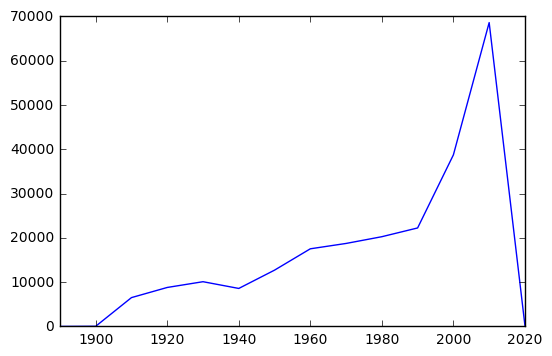

In [151]:
t.decade.value_counts().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

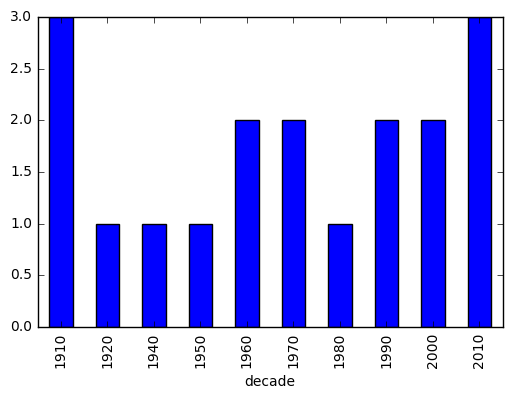

In [76]:
Hamlet = t[t.title == 'Hamlet']
Hamlet.groupby('decade').size().plot(kind = 'bar')

In [78]:
t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index()

2010    3
1910    3
1970    2
2000    2
1960    2
1990    2
1950    1
1980    1
1940    1
1920    1
Name: year, dtype: int64

### Plot the number of "Rustler" characters in each decade of the history of film.

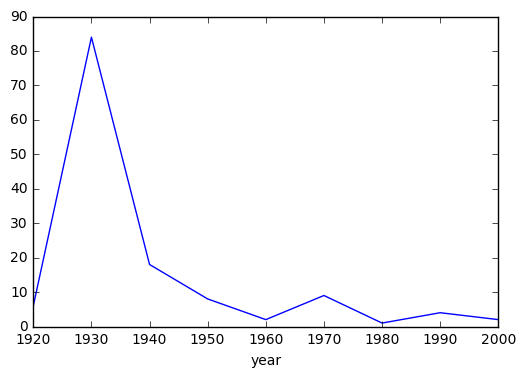

In [11]:
r = c[c.character == 'Rustler']
r.groupby(r.year // 10 * 10).size().plot()

### Plot the number of "Hamlet" characters each decade.

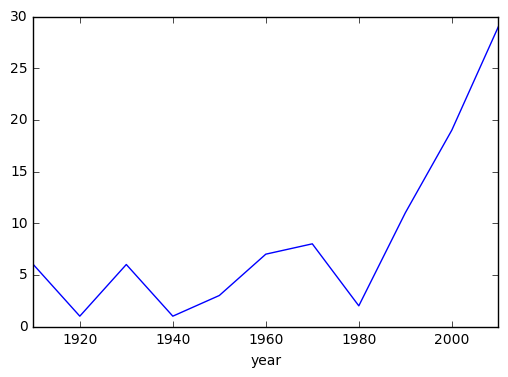

In [12]:
r = c[c.character == 'Hamlet']
r.groupby(r.year // 10 * 10).size().plot()

### What are the 11 most common character names in movie history?

In [22]:
c.groupby(c.character).size().sort_values().tail(11)

character
Minor Role      6279
Bartender       6628
Nurse           6701
Party Guest     6798
Policeman       6894
Student         7211
Doctor          7459
Reporter        8164
Extra          11064
Dancer         12103
Himself        19653
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [82]:
h = c[c.character == 'Herself']
h.groupby('name').size().sort_values().tail(10)

name
Jacqueline Kennedy                   5
Queen Elizabeth the Queen Mother     5
Joan Rivers                          6
Sumie Sakai                          6
Marilyn Monroe                       6
Mary Jo Pehl                         7
Hillary Clinton                      7
Margaret Thatcher                    8
Joyce Brothers                       9
Queen Elizabeth II                  11
dtype: int64

In [79]:
h[h.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II                  11
Joyce Brothers                       9
Margaret Thatcher                    8
Hillary Clinton                      7
Mary Jo Pehl                         7
Marilyn Monroe                       6
Sumie Sakai                          6
Joan Rivers                          6
Jacqueline Kennedy                   5
Queen Elizabeth the Queen Mother     5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [31]:
hi = c[c.character == 'Himself']
hi.groupby('name').size().sort_values().tail(10)

name
Franklin D. Roosevelt     21
Martin Luther King        22
Ron Jeremy                23
George W. Bush            23
Benito Mussolini          23
Winston Churchill         24
John F. Kennedy           36
Ronald Reagan             39
Richard Nixon             46
Adolf Hitler             100
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [34]:
mo = c[c.year == 1945]
mo.groupby('name').size().sort_values().tail(1)

name
Emmett Vogan    39
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [35]:
mo = c[c.year == 1985]
mo.groupby('name').size().sort_values().tail(1)

name
Mammootty    22
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

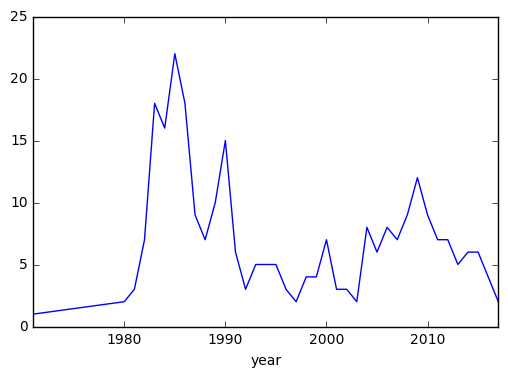

In [44]:
ma = c[c.name == 'Mammootty']
ma.groupby('year').size().plot()

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [50]:
c = cast
ro = c[c.character.str.startswith('Patron in')].groupby('character').size().sort_values().tail(10)
ro

character
Patron in Quiet Bar              2
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Bar                    4
Patron in restaurant             4
Patron in Billiard Parlor        5
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Frisky Rabbit         16
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [51]:
c = cast
ro = c[c.character.str.startswith('Science')].groupby('character').size().sort_values().tail(10)
ro

character
Science Fair Kid         3
Science                  4
Science Reporter         5
Science Promo Cadet      5
Science Kid              5
Science Club Member      5
Science Fair Judge       6
Science Student          9
Science Fair Student     9
Science Teacher         60
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

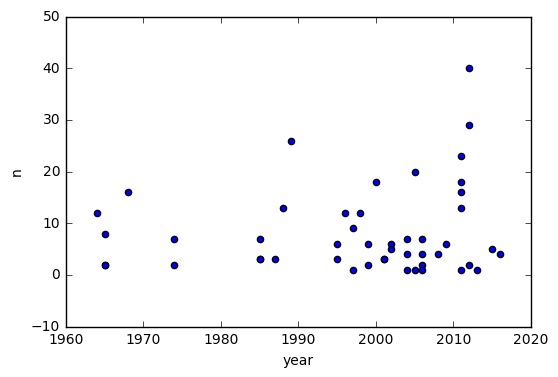

In [57]:
c = cast
j = c[c.name == 'Judi Dench']
j.plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-values of Cary Grant's roles through his career.

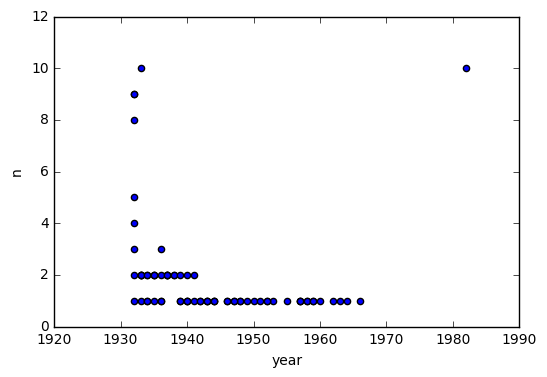

In [58]:
c = cast
j = c[c.name == 'Cary Grant']
j.plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

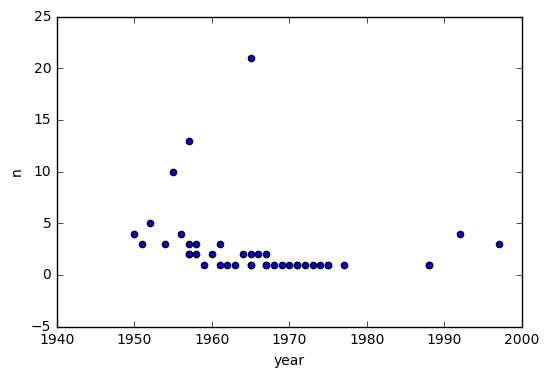

In [59]:
c = cast
j = c[c.name == 'Sidney Poitier']
j.plot(x = 'year', y = 'n', kind = 'scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [64]:
c = cast
c[(c.n == 1) & (c.year // 10 * 10 == 1950)].groupby('type').size()

type
actor      6622
actress    2971
dtype: int64

type
actor      4570
actress    4564
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [66]:
c = cast
c[(c.n == 2) & (c.year // 10 * 10 == 1950)].groupby('type').size()

type
actor      4570
actress    4564
dtype: int64

# Examples by Brandon Rhodes

In [7]:
import hashlib
with open ('data/titles.csv', 'rb') as f:
    print(hashlib.md5(f.read()).hexdigest())

52377068c34818c62ee3ed0928de3c73


In [12]:
%%time
cast[cast.title == 'Sleuth']

Wall time: 216 ms


,title,year,name,type,character,n
252564,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
317511,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
317512,Sleuth,2007,Michael Caine,actor,Andrew,1.0
363543,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
363544,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1257779,Sleuth,2007,Jude Law,actor,Milo,2.0
1408727,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1424988,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1658540,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1756261,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [18]:
c = cast.set_index(['title', 'year']).sort_index()
c.head()

name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [24]:
%%time
c.loc['Sleuth']

Wall time: 500 µs


,name,type,character,n
year,,,,
1972,Michael Caine,actor,Milo Tindle,2.0
1972,Alec Cawthorne,actor,Inspector Doppler,3.0
1972,Teddy Martin,actor,Police Constable Higgs,6.0
1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1972,Laurence Olivier,actor,Andrew Wyke,1.0
1972,Eve (III) Channing,actress,Marguerite Wyke,5.0
2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
2007,Michael Caine,actor,Andrew,1.0
2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN


In [27]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['title', 'year', 'character']).size()

title                               year  character               
A Very Murray Christmas             2015  George Clooney              1
Batman & Robin                      1997  Batman                      1
                                          Bruce Wayne                 1
Burn After Reading                  2008  Harry Pfarrer               1
Confessions of a Dangerous Mind     2002  Jim Byrd                    1
Curdled                             1996  Seth Gecko                  1
Fantastic Mr. Fox                   2009  Mr. Fox                     1
From Dusk Till Dawn                 1996  Seth Gecko                  1
Good Night, and Good Luck.          2005  Fred Friendly               1
Gravity                             2013  Matt Kowalski               1
Grizzly II: The Concert             1983  Ron                         1
Hail, Caesar!                       2016  Baird Whitlock              1
Intolerable Cruelty                 2003  Miles                      

In [28]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['title', 'year']).size()

title                               year
A Very Murray Christmas             2015    1
Batman & Robin                      1997    2
Burn After Reading                  2008    1
Confessions of a Dangerous Mind     2002    1
Curdled                             1996    1
Fantastic Mr. Fox                   2009    1
From Dusk Till Dawn                 1996    1
Good Night, and Good Luck.          2005    1
Gravity                             2013    1
Grizzly II: The Concert             1983    1
Hail, Caesar!                       2016    1
Intolerable Cruelty                 2003    1
Leatherheads                        2008    1
Michael Clayton                     2007    1
Money Monster                       2016    1
Morning Glory                       2010    1
O Brother, Where Art Thou?          2000    1
Ocean's Eleven                      2001    1
Ocean's Thirteen                    2007    1
Ocean's Twelve                      2004    1
One Fine Day                        199

In [30]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['year']).size()

year
1983    1
1987    1
1988    1
1992    2
1996    3
1997    3
1998    2
1999    4
2000    2
2001    2
2002    3
2003    2
2004    1
2005    2
2006    1
2007    2
2008    2
2009    3
2010    3
2011    2
2013    1
2014    1
2015    2
2016    2
dtype: int64

In [43]:
c = cast
c = c[c.name == 'George Clooney']
#c.groupby(['year']).n.size()
c.groupby(c.year // 10 * 10).n.size() # Create a decade for groupby

year
1980     3
1990    14
2000    20
2010    11
dtype: int64

In [191]:
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27111
      actress     15499
1920  actor       47923
      actress     23604
1930  actor      150007
      actress     49157
1940  actor      160888
      actress     51085
1950  actor      155338
      actress     56507
1960  actor      131212
      actress     56096
1970  actor      150248
      actress     65147
1980  actor      194113
      actress     89434
1990  actor      259400
      actress    122628
2000  actor      485809
      actress    261289
2010  actor      699286
      actress    392117
2020  actor         177
      actress        90
dtype: int64

In [5]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]

g = c.groupby(['character', c.year // 10 * 10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [6]:
u = g.unstack(0).fillna(0) # u = g.unstack(0).fillna('')
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,0.0
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,0.0


In [7]:
u.stack()

year  character       
1970  Kermit the Frog     1.0
      Oscar the Grouch    0.0
1980  Kermit the Frog     4.0
      Oscar the Grouch    2.0
1990  Kermit the Frog     2.0
      Oscar the Grouch    1.0
2000  Kermit the Frog     1.0
      Oscar the Grouch    1.0
2010  Kermit the Frog     1.0
      Oscar the Grouch    0.0
dtype: float64

In [8]:
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,0.0
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,0.0


In [9]:
u['Kermit the Frog'] - u['Oscar the Grouch']

year
1970    1.0
1980    2.0
1990    1.0
2000    0.0
2010    1.0
dtype: float64

In [10]:
df = g.unstack('character')
df['extra'] = 1 # the index needs to be replaced in order to unstack twice
df = df.set_index('extra', drop=True, append=True)
df.unstack(0)

character Kermit the Frog                     Oscar the Grouch                 \
year                 1970 1980 1990 2000 2010             1970 1980 1990 2000   
extra                                                                           
1                     1.0  4.0  2.0  1.0  1.0              NaN  2.0  1.0  1.0   

character       
year      2010  
extra           
1          NaN